<a href="https://colab.research.google.com/github/Untick/InspectrumClinic_RS_gr1/blob/main/Lyakhov%20Igor/6_setup_of_git.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Рекомендательная система для профпатолога (INSPECTRUM CLINIC)

## Анализ датасета



In [ ]:
# Импорт библиотек
import pandas as pd
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop
from tensorflow.keras.metrics import *
#from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
# Дополнительные инструменты
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import utils
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from google.colab import data_table
data_table.enable_dataframe_formatter()

import random
import math
import os
import re
%matplotlib inline

In [ ]:

import gdown
gdown.download('https://storage.yandexcloud.net/terratraineeship/23_InspectrumClinic_RS/datasets/%D0%B4%D0%B0%D1%82%D0%B0%D1%81%D0%B5%D1%82%20%D0%BF%D1%80%D0%BE%D1%84%D0%BF%D0%B0%D1%82%D0%BE%D0%BB%D0%BE%D0%B3%20%D1%87%D0%B0%D1%81%D1%82%D1%8C.xlsx', None, quiet=True)

'%D0%B4%D0%B0%D1%82%D0%B0%D1%81%D0%B5%D1%82%20%D0%BF%D1%80%D0%BE%D1%84%D0%BF%D0%B0%D1%82%D0%BE%D0%BB%D0%BE%D0%B3%20%D1%87%D0%B0%D1%81%D1%82%D1%8C.xlsx'

In [ ]:
# Считывание и запись данных
data = pd.read_excel('%D0%B4%D0%B0%D1%82%D0%B0%D1%81%D0%B5%D1%82%20%D0%BF%D1%80%D0%BE%D1%84%D0%BF%D0%B0%D1%82%D0%BE%D0%BB%D0%BE%D0%B3%20%D1%87%D0%B0%D1%81%D1%82%D1%8C.xlsx')

In [ ]:
# Количество строк и столбцов
data.shape

(1982, 4587)

In [ ]:
# Количество элементов в таблице
data.size

9091434

In [ ]:
# количество непустых записей в каждом столбце
data.count()

ДокументПрохождениеМедосмотра                                             1982
Клиент                                                                    1982
КлиентДатаРождения                                                        1982
КлиентПол                                                                 1982
КлиентПолПредставление                                                    1982
                                                                          ... 
Стоматология2_ВП2_ЗначениеПредставление                                      1
Терапия2_ЗаключениеФОГК_Значение                                             1
Терапия2_ЗаключениеФОГК_ЗначениеПредставление                                1
Офтальмология1_ДвигательныйАппаратГлазДополнение_Значение                    1
Офтальмология1_ДвигательныйАппаратГлазДополнение_ЗначениеПредставление       1
Length: 4587, dtype: int64

In [ ]:
# тип данных каждого столбца
data.dtypes

ДокументПрохождениеМедосмотра                                                     object
Клиент                                                                            object
КлиентДатаРождения                                                        datetime64[ns]
КлиентПол                                                                         object
КлиентПолПредставление                                                            object
                                                                               ...      
Стоматология2_ВП2_ЗначениеПредставление                                           object
Терапия2_ЗаключениеФОГК_Значение                                                  object
Терапия2_ЗаключениеФОГК_ЗначениеПредставление                                     object
Офтальмология1_ДвигательныйАппаратГлазДополнение_Значение                         object
Офтальмология1_ДвигательныйАппаратГлазДополнение_ЗначениеПредставление            object
Length: 4587, dtype: 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1982 entries, 0 to 1981
Columns: 4587 entries, ДокументПрохождениеМедосмотра to Офтальмология1_ДвигательныйАппаратГлазДополнение_ЗначениеПредставление
dtypes: bool(1), datetime64[ns](43), float64(1253), object(3290)
memory usage: 69.3+ MB


In [ ]:
# названия колонок
col_names = list(data.columns)
col_names_count = len(col_names)
print(f'Число названий колонок: {col_names_count}')
print('-'*50)
print(col_names)

Число названий колонок: 4587
--------------------------------------------------
['ДокументПрохождениеМедосмотра', 'Клиент', 'КлиентДатаРождения', 'КлиентПол', 'КлиентПолПредставление', 'ДатаЗавершенияМедосмотра', 'ТипМедосмотра', 'ТипМедосмотраПредставление', 'ПсихОсвидетельствование', 'Контрагент', 'Цех', 'Профессия', 'ЗаключениеМК', 'ЗаключениеМКПредставление', 'Заключение', 'ДиспансернаяГруппа', 'ДиспансернаяГруппаПредставление', 'ВредныеФакторы', 'ЛабораторныеИсследования1_ДокументПрием', 'ЛабораторныеИсследования1_ДатаПриема', 'ЛабораторныеИсследования1_Салон', 'ЛабораторныеИсследования1_СалонПредставление', 'ЛабораторныеИсследования1_Специализация', 'ЛабораторныеИсследования1_СпециализацияПредставление', 'ЛабораторныеИсследования1_ХР_Рекомендация1', 'ЛабораторныеИсследования1_ХР_Рекомендация1Представление', 'ЛабораторныеИсследования1_ХР_Рекомендация2', 'ЛабораторныеИсследования1_ХР_Рекомендация2Представление', 'ЛабораторныеИсследования1_ХР_РекомендацияСтр', 'ЛабораторныеИсследова

In [ ]:
# количество пропусков в каждом столбце
data.isna().sum()

ДокументПрохождениеМедосмотра                                                0
Клиент                                                                       0
КлиентДатаРождения                                                           0
КлиентПол                                                                    0
КлиентПолПредставление                                                       0
                                                                          ... 
Стоматология2_ВП2_ЗначениеПредставление                                   1981
Терапия2_ЗаключениеФОГК_Значение                                          1981
Терапия2_ЗаключениеФОГК_ЗначениеПредставление                             1981
Офтальмология1_ДвигательныйАппаратГлазДополнение_Значение                 1981
Офтальмология1_ДвигательныйАппаратГлазДополнение_ЗначениеПредставление    1981
Length: 4587, dtype: int64

In [ ]:
data.head()

ДокументПрохождениеМедосмотра                                Клиент  \
0  7f41ca7e-7dac-11ec-80fc-0cc47aab8067  c91e3407-b81f-11e9-80cf-0cc47aab8067   
1  2ee1f9ac-83dd-11ec-80fc-0cc47aab8067  1a1a5fea-8b7f-11eb-80e8-0cc47aab8067   
2  9cbb191e-8e24-11ec-80fe-0cc47aab8067  7fe324e0-fa51-11eb-80f6-0cc47aab8067   
3  b8a33910-8eec-11ec-80fe-0cc47aab8067  98f9d761-8d65-11ec-80fe-0cc47aab8067   
4  0bb0d181-938c-11ec-80fe-0cc47aab8067  009aac7d-7bcf-11eb-80e8-0cc47aab8067   

  КлиентДатаРождения КлиентПол КлиентПолПредставление  \
0         1976-10-24   Женский                Женский   
1         1987-11-18   Мужской                Мужской   
2         1985-09-08   Мужской                Мужской   
3         1988-04-25   Мужской                Мужской   
4         1984-04-17   Мужской                Мужской   

  ДатаЗавершенияМедосмотра  ТипМедосмотра ТипМедосмотраПредставление  \
0               2022-01-25  Периодический              Периодический   
1               2022-02-02  Периодический              Периодический   
2               2022-02-15  Периодический              Периодический   
3               2022-02-16  Периодический              Периодический   
4               2022-02-22  Периодический              Периодический   

   ПсихОсвидетельствование                            Контрагент  ...  \
0                    False  23c173a7-30d9-11e7-80d8-708bcd7f83cd  ...   
1                    False  a6d559b0-7835-11eb-80e8-0cc47aab8067  ...   
2                    False  a6d559b0-7835-11eb-80e8-0cc47aab8067  ...   
3                    False  a6d559b0-7835-11eb-80e8-0cc47aab8067  ...   
4                    False  a6d559b0-7835-11eb-80e8-0cc47aab8067  ...   

  Оториноларингология3_Аудиометрия1_Значение  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

  Оториноларингология3_Аудиометрия1_ЗначениеПредставление  \
0                                                NaN        
1                                                NaN        
2                                                NaN        
3                                                NaN        
4                                                NaN        

  Оториноларингология1_ЖалобыДополнение_Значение  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   

  Оториноларингология1_ЖалобыДополнение_ЗначениеПредставление  \
0                                                NaN            
1                                                NaN            
2                                                NaN            
3                                                NaN            
4                                                NaN            

  Стоматология2_ВП2_Значение Стоматология2_ВП2_ЗначениеПредставление  \
0                        NaN                                     NaN   
1                        NaN                                     NaN   
2                        NaN                                     NaN   
3                        NaN                                     NaN   
4                        NaN                                     NaN   

  Терапия2_ЗаключениеФОГК_Значение  \
0                              NaN   
1                              NaN   
2                              NaN   
3                              NaN   
4                              NaN   

  Терапия2_ЗаключениеФОГК_ЗначениеПредставление  \
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                           NaN   
4                              

In [ ]:
# долю пропусков от общего количества элементов
data.isna().sum() / data.shape[0]

ДокументПрохождениеМедосмотра                                             0.000000
Клиент                                                                    0.000000
КлиентДатаРождения                                                        0.000000
КлиентПол                                                                 0.000000
КлиентПолПредставление                                                    0.000000
                                                                            ...   
Стоматология2_ВП2_ЗначениеПредставление                                   0.999495
Терапия2_ЗаключениеФОГК_Значение                                          0.999495
Терапия2_ЗаключениеФОГК_ЗначениеПредставление                             0.999495
Офтальмология1_ДвигательныйАппаратГлазДополнение_Значение                 0.999495
Офтальмология1_ДвигательныйАппаратГлазДополнение_ЗначениеПредставление    0.999495
Length: 4587, dtype: float64

In [ ]:
# общее количество пропусков во всей таблице
data.isna().sum().sum()

8106978

In [ ]:
# общее количество пропусков во всей таблице в %
proc = data.isna().sum().sum() / data.size
print('{:.1%}'.format(proc))

89.2%


In [ ]:
#@title Столбцы с общей информацией
print(list(data.columns[:6]))

['ДокументПрохождениеМедосмотра', 'Клиент', 'КлиентДатаРождения', 'КлиентПол', 'КлиентПолПредставление', 'ДатаЗавершенияМедосмотра']


In [ ]:
# проанализируем целевую колонку на уникальные значения
unique_names = data['ЗаключениеМК'].unique().tolist()
print(unique_names)

['Годен', 'ГоденСКоррекциейЗрения', 'ГоденБезРаботНаВысотах', 'НуждаетсяВДообследованииИЛечении', 'ВременноНегоден', 'ОграниченноГоден', nan, 'машинист бульдозера', 'Газоспасатель', ' Газоспасатель']


In [ ]:
# удаляем строки с очевидными ошибками

In [ ]:
#Убираем пустые колонки
empty_columns = data.columns[data.isna().all()]
data.drop(empty_columns, inplace = True, axis = 1)

In [ ]:

FIELD_CLIENT_AGE = "КлиентВозраст"
FIELD_CLIENT_BIRTH_DAY = "КлиентДатаРождения"
FIELD_CLIENT_GENDER = "КлиентПол"
FIELD_CLIENT_GENDER_M = 0
FIELD_CLIENT_GENDER_F = 1
FIELD_CONCLUSION = "ЗаключениеМК"
FIELD_CONCLUSION_FIT = 0
FIELD_CONCLUSION_PART_FIT = 1
FIELD_CONCLUSION_NOT_FIT = 2

FIELD_DISPANSARY_GROUP = "ДиспансернаяГруппа"
FIELD_DISPANSARY_GROUP_I = 0
FIELD_DISPANSARY_GROUP_II = 1
FIELD_DISPANSARY_GROUP_III = 2
FIELD_DISPANSARY_GROUP_OTHER = 3

FIELD_HARMFUL_FACTORS = "ВредныеФакторы"

In [ ]:
from datetime import datetime
# Определяем функцию для расчета возраста на основе даты
def calculate_age_from_date(date):
    current_year = pd.Timestamp.now().year
    age = current_year - date.year
    return age

In [ ]:
#проверяем список уникальных значений
unique_names2 = data['ЗаключениеМК'].unique().tolist()
print(unique_names2)

['Годен', 'ГоденСКоррекциейЗрения', 'ГоденБезРаботНаВысотах', 'НуждаетсяВДообследованииИЛечении', 'ВременноНегоден', 'ОграниченноГоден', nan, 'машинист бульдозера', 'Газоспасатель', ' Газоспасатель']


In [ ]:
# удалить ошибочные данные
data = data.drop(data[data['ЗаключениеМК'] == 'машинист бульдозера'].index)
data = data.drop(data[data['ЗаключениеМК'] == 'Газоспасатель'].index)
data = data.drop(data[data['ЗаключениеМК'] == ' Газоспасатель'].index)

In [ ]:
# просмотр значений в целевой колонке
data['ЗаключениеМК'].value_counts()

Годен                               1434
ГоденСКоррекциейЗрения               123
ВременноНегоден                        9
НуждаетсяВДообследованииИЛечении       2
ОграниченноГоден                       2
ГоденБезРаботНаВысотах                 1
Name: ЗаключениеМК, dtype: int64

In [ ]:
# перенос в новый датасет колонок, котрые на мой взгляд будут влиять на результат
import re

data_1 = data.filter(regex=re.compile(r'ГоденНегоден_ЗначениеПредставление|ВредныеФакторы|ЗаключениеМК|Профессия|Диспансерная|Психосвидетельствование|МКБ'))
print(data_1.shape)

(1978, 129)


In [ ]:
# Замена NAN на 0 соответствующего типа
for i in data_1.columns.values.tolist():
    if data_1[i].dtypes==object:
       data_1[i]= data_1[i].fillna('0')
    elif data_1[i].dtypes==int or  data_1[i].dtypes==float:
       data_1[i]= data_1[i].fillna(0)

<ipython-input-34-742e85ff2658>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1[i]= data_1[i].fillna('0')


In [ ]:
# преобразование значений в целевой колонке к трем классам
data_1['ЗаключениеМК'] = data_1['ЗаключениеМК'].map({'Годен': 'Годен', 'ГоденСКоррекциейЗрения': 'ОграниченноГоден', 'ВременноНегоден': 'ОграниченноГоден', 'НуждаетсяВДообследованииИЛечении': 'ОграниченноГоден', 'ОграниченноГоден': 'ОграниченноГоден', 'ГоденБезРаботНаВысотах': 'ОграниченноГоден'})
data_1['ЗаключениеМК'].value_counts()


<ipython-input-35-f1a4d414a43a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['ЗаключениеМК'] = data_1['ЗаключениеМК'].map({'Годен': 'Годен', 'ГоденСКоррекциейЗрения': 'ОграниченноГоден', 'ВременноНегоден': 'ОграниченноГоден', 'НуждаетсяВДообследованииИЛечении': 'ОграниченноГоден', 'ОграниченноГоден': 'ОграниченноГоден', 'ГоденБезРаботНаВысотах': 'ОграниченноГоден'})


Годен               1434
ОграниченноГоден     137
Name: ЗаключениеМК, dtype: int64

In [ ]:
# удаление дублирующей колонки и колонки с значением nan (они нашлись придальнейшей обработке таблицы)
data_1 = data_1.drop('ЗаключениеМКПредставление',  axis=1)


In [ ]:
data_1 = data_1.drop('ДиспансернаяГруппа',  axis=1)

In [ ]:
data_1

Профессия      ЗаключениеМК  \
0         Ведущий специалист по организации обуения             Годен   
1                                Ведущий специалист             Годен   
2                                  Главный менеджер  ОграниченноГоден   
3                                Главный специалист             Годен   
4                                Старший специалист  ОграниченноГоден   
...                                             ...               ...   
1977                      Директор по строительству               NaN   
1978  Начальник производственно-технического отдела               NaN   
1979                            Помощник кладовщика               NaN   
1980                                         Повар                NaN   
1981                                   Анестезиолог             Годен   

     ДиспансернаяГруппаПредставление ВредныеФакторы  \
0                                  I           11.4   
1                               IIIа          4.2.5   
2                                 II          4.2.5   
3                                  I           11.1   
4                                 II           11.1   
...                              ...            ...   
1977                               0            6.1   
1978                               0            6.1   
1979                               0         5.1,23   
1980                               0             23   
1981                               0             27   

     ПсихиатрияНаркология1_МКБ101  \
0                           Z00.0   
1                           Z00.0   
2                           Z00.0   
3                               0   
4                               0   
...                           ...   
1977                            0   
1978                            0   
1979                        Z00.0   
1980                        Z00.0   
1981                        Z00.0   

     ПсихиатрияНаркология1_ГоденНегоден_ЗначениеПредставление  \
0                                                 Годен         
1                                                 Годен         
2                                                 Годен         
3                                                     0         
4                                                     0         
...                                                 ...         
1977                                                  0         
1978                                                  0         
1979                                              Годен         
1980                                              Годен         
1981                                              Годен         

     Офтальмология1_МКБ101 Офтальмология1_ГоденНегоден_ЗначениеПредставление  \
0                    Z00.0                                             Годен   
1                    Z00.0                                             Годен   
2                    H52.1                                             Годен   
3                    Z00.0                                             Годен   
4                    H52.2                                             Годен   
...                    ...                                               ...   
1977                     0                                                 0   
1978                     0                                                 0   
1979                 Z00.0                                             Годен   
1980                     0                                                 0   
1981                     0                                                 0   

     Оториноларингология1_МКБ101  \
0                          Z00.0   
1                              0   
2                              0   
3                          Z00.0   
4                          Z00.0   
...                          ...   
1977                           0   
1978                         

In [ ]:
# преобразование данных в числовые
import numpy as np

In [ ]:
# подготовка колонок для перевода категориальных данных в OHE
data_2 = data_1.copy()
data_2.drop(['Профессия', 'ЗаключениеМК', 'ВредныеФакторы'], axis=1, inplace=True)
data_2

ДиспансернаяГруппаПредставление ПсихиатрияНаркология1_МКБ101  \
0                                  I                        Z00.0   
1                               IIIа                        Z00.0   
2                                 II                        Z00.0   
3                                  I                            0   
4                                 II                            0   
...                              ...                          ...   
1977                               0                            0   
1978                               0                            0   
1979                               0                        Z00.0   
1980                               0                        Z00.0   
1981                               0                        Z00.0   

     ПсихиатрияНаркология1_ГоденНегоден_ЗначениеПредставление  \
0                                                 Годен         
1                                                 Годен         
2                                                 Годен         
3                                                     0         
4                                                     0         
...                                                 ...         
1977                                                  0         
1978                                                  0         
1979                                              Годен         
1980                                              Годен         
1981                                              Годен         

     Офтальмология1_МКБ101 Офтальмология1_ГоденНегоден_ЗначениеПредставление  \
0                    Z00.0                                             Годен   
1                    Z00.0                                             Годен   
2                    H52.1                                             Годен   
3                    Z00.0                                             Годен   
4                    H52.2                                             Годен   
...                    ...                                               ...   
1977                     0                                                 0   
1978                     0                                                 0   
1979                 Z00.0                                             Годен   
1980                     0                                                 0   
1981                     0                                                 0   

     Оториноларингология1_МКБ101  \
0                          Z00.0   
1                              0   
2                              0   
3                          Z00.0   
4                          Z00.0   
...                          ...   
1977                           0   
1978                           0   
1979                       Z00.0   
1980                       Z00.0   
1981                       Z00.0   

     Оториноларингология1_ГоденНегоден_ЗначениеПредставление  \
0                                                 Годен        
1                                                     0        
2                                                     0        
3                                                 Годен        
4                                                 Годен        
...                                                 ...        
1977                                                  0        
1978                                                  0        
1979                                              Годен        
1980                                              Годен        
1981                                              Годен        

     ХирургНеИсп1_МКБ101 ХирургНеИсп1_ГоденНегоден_ЗначениеПредставление  \
0                  Z00.0                                           Годен   
1                      0                                               0   
2   

In [ ]:
#Преобразование в OHE
data_2 = pd.get_dummies(data_2)
data_2

ДиспансернаяГруппаПредставление_0  ДиспансернаяГруппаПредставление_I  \
0                                     0                                  1   
1                                     0                                  0   
2                                     0                                  0   
3                                     0                                  1   
4                                     0                                  0   
...                                 ...                                ...   
1977                                  1                                  0   
1978                                  1                                  0   
1979                                  1                                  0   
1980                                  1                                  0   
1981                                  1                                  0   

      ДиспансернаяГруппаПредставление_II  \
0                                      0   
1                                      0   
2                                      1   
3                                      0   
4                                      1   
...                                  ...   
1977                                   0   
1978                                   0   
1979                                   0   
1980                                   0   
1981                                   0   

      ДиспансернаяГруппаПредставление_IIIа  \
0                                        0   
1                                        1   
2                                        0   
3                                        0   
4                                        0   
...                                    ...   
1977                                     0   
1978                                     0   
1979                                     0   
1980                                     0   
1981                                     0   

      ДиспансернаяГруппаПредставление_IIIб  ПсихиатрияНаркология1_МКБ101_0  \
0                                        0                               0   
1                                        0                               0   
2                                        0                               0   
3                                        0                               1   
4                                        0                               1   
...                                    ...                             ...   
1977                                     0                               1   
1978                                     0                               1   
1979                                     0                               0   
1980                                     0                               0   
1981                                     0                               0   

      ПсихиатрияНаркология1_МКБ101_F06.6  ПсихиатрияНаркология1_МКБ101_F06.7  \
0                                      0                                   0   
1                                      0                                   0   
2                                      0                                   0   
3                                      0                                   0   
4                                      0                                   0   
...                                  ...                                 ...   
1977                                   0                                   0   
1978                                   0                                   0   
1979                                   0                                   0   
1980                                   0                                   0   
1981                                   0                                   0   

      ПсихиатрияНаркология1_МКБ101_F07.0  ПсихиатрияНаркология1_МКБ101_F10.1  \
0        

In [ ]:
#Формирование таблицы с нужными стобцами для перобразования в OHE
data_3 = data_1[['ВредныеФакторы']]
data_3


ВредныеФакторы
0              11.4
1             4.2.5
2             4.2.5
3              11.1
4              11.1
...             ...
1977            6.1
1978            6.1
1979         5.1,23
1980             23
1981             27

[1978 rows x 1 columns]

In [ ]:
# Разбиваем строки на списки значений и объединяем их в один список
all_values = []
for value_list in data_3['ВредныеФакторы'].str.split(','):
    all_values.extend(value_list)

# Создаем новые столбцы с one-hot encoding
for unique_value in set(all_values):
    data_3[f'one_hot_{unique_value}'] = data_3['ВредныеФакторы'].str.contains(unique_value).astype(int)

# Удаляем исходный столбец
data_3.drop(columns=['ВредныеФакторы'], inplace=True)

<ipython-input-43-19b0292a11d3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_3[f'one_hot_{unique_value}'] = data_3['ВредныеФакторы'].str.contains(unique_value).astype(int)
<ipython-input-43-19b0292a11d3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_3[f'one_hot_{unique_value}'] = data_3['ВредныеФакторы'].str.contains(unique_value).astype(int)
<ipython-input-43-19b0292a11d3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [ ]:
data_3

one_hot_1.23  one_hot_3.1.8.3  one_hot_4.2.5  one_hot_23  one_hot_27  \
0                0                0              0           0           0   
1                0                0              1           0           0   
2                0                0              1           0           0   
3                0                0              0           0           0   
4                0                0              0           0           0   
...            ...              ...            ...         ...         ...   
1977             0                0              0           0           0   
1978             0                0              0           0           0   
1979             1                0              0           1           0   
1980             0                0              0           1           0   
1981             0                0              0           0           1   

      one_hot_1.48  one_hot_18  one_hot_1.29  one_hot_1.39  one_hot_1.49.14  \
0                0           0             0             0                0   
1                0           0             0             0                0   
2                0           0             0             0                0   
3                0           0             0             0                0   
4                0           0             0             0                0   
...            ...         ...           ...           ...              ...   
1977             0           0             0             0                0   
1978             0           0             0             0                0   
1979             0           0             0             0                0   
1980             0           0             0             0                0   
1981             0           0             0             0                0   

      ...  one_hot_13  one_hot_6.1  one_hot_2.4.3  one_hot_1.2  one_hot_1.37  \
0     ...           0            0              0            0             0   
1     ...           0            0              0            0             0   
2     ...           0            0              0            0             0   
3     ...           0            0              0            0             0   
4     ...           0            0              0            0             0   
...   ...         ...          ...            ...          ...           ...   
1977  ...           0            1              0            0             0   
1978  ...           0            1              0            0             0   
1979  ...           0            0              0            1             0   
1980  ...           0            0              0            0             0   
1981  ...           0            0              0            0             0   

      one_hot_1.14.1  one_hot_26  one_hot_6  one_hot_1.34.1  one_hot_1.24  
0                  0           0          0               0             0  
1                  0           0          0               0             0  
2                  0           0          0               0             0  
3                  0           0          0               0             0  
4                  0           0          0               0             0  
...              ...         ...        ...             ...           ...  
1977               0           0          1               0             0  
1978               0           0          1               0             0  
1979               0           0          0               0             0  
1980               0           0          0               0             0  
1981               0           0          0               0             0  

[1978 rows x 92 columns]

In [ ]:
# обьединение двух таблиц в формате OHE
data_ohe = pd.concat([data_3, data_2], axis=1)

In [ ]:
data_ohe = data_ohe.astype(float)
xTrain01 = data_ohe.to_numpy()
xTrain01.shape

(1978, 559)

In [ ]:
#Формирование таблицы с нужными стобцами
data_4 = data_1[['ЗаключениеМК']]
data_4

ЗаключениеМК
0                Годен
1                Годен
2     ОграниченноГоден
3                Годен
4     ОграниченноГоден
...                ...
1977               NaN
1978               NaN
1979               NaN
1980               NaN
1981             Годен

[1978 rows x 1 columns]

In [ ]:
# yTrain =  pd.get_dummies(data_4)
# yTrain = yTrain['ЗаключениеМК_ОграниченноГоден'].to_numpy()
yTrain =  pd.get_dummies(data_4)
yTrain = yTrain.astype(float)
yTrain = yTrain.to_numpy()

In [ ]:
yTrain

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 0.],
       [0., 0.],
       [1., 0.]])

In [ ]:
yTrain.shape

(1978, 2)

In [ ]:
#Формирование таблицы с нужными стобцами
data_5 = data_1[['Профессия']]
data_5


Профессия
0         Ведущий специалист по организации обуения
1                                Ведущий специалист
2                                  Главный менеджер
3                                Главный специалист
4                                Старший специалист
...                                             ...
1977                      Директор по строительству
1978  Начальник производственно-технического отдела
1979                            Помощник кладовщика
1980                                         Повар 
1981                                   Анестезиолог

[1978 rows x 1 columns]

In [ ]:
# получаем значения из столбца "Профессия" в переменную data
data = data_5['Профессия'].values
xTrain03 = np.array(data)

# Вывод размера массива
print(xTrain03.shape)

(1978,)


In [ ]:
#sklearn.utils.resample
from gensim.models import Word2Vec

# Разбиваем строки на списки слов
data_5['split_profession'] = data_5['Профессия'].str.split()

# Обучаем Word2Vec модель на полученных словах
model = Word2Vec(data_5['split_profession'], min_count=1, vector_size=100, window=5)

def get_sentence_vector(sentence, model):
    words = sentence.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if not word_vectors:
        return np.zeros(model.vector_size)
    return np.mean(word_vectors, axis=0)

data_5['vector_profession'] = data_5['Профессия'].apply(lambda x: get_sentence_vector(x, model))
data_5

<ipython-input-54-48fc163b3fc2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_5['split_profession'] = data_5['Профессия'].str.split()
<ipython-input-54-48fc163b3fc2>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_5['vector_profession'] = data_5['Профессия'].apply(lambda x: get_sentence_vector(x, model))


Профессия  \
0         Ведущий специалист по организации обуения   
1                                Ведущий специалист   
2                                  Главный менеджер   
3                                Главный специалист   
4                                Старший специалист   
...                                             ...   
1977                      Директор по строительству   
1978  Начальник производственно-технического отдела   
1979                            Помощник кладовщика   
1980                                         Повар    
1981                                   Анестезиолог   

                                       split_profession  \
0       [Ведущий, специалист, по, организации, обуения]   
1                                 [Ведущий, специалист]   
2                                   [Главный, менеджер]   
3                                 [Главный, специалист]   
4                                 [Старший, специалист]   
...                                                 ...   
1977                      [Директор, по, строительству]   
1978  [Начальник, производственно-технического, отдела]   
1979                             [Помощник, кладовщика]   
1980                                            [Повар]   
1981                                     [Анестезиолог]   

                                      vector_profession  
0     [-0.005164328, 0.009342287, 0.002804761, 0.004...  
1     [-0.009749597, 0.010856726, 0.0017935378, 0.00...  
2     [0.0031821216, 0.002086625, 0.002053248, 0.001...  
3     [-0.004220541, 0.006177929, 0.0007959276, 0.01...  
4     [-0.010430453, 0.010763159, -0.0018237778, 0.0...  
...                                                 ...  
1977  [-0.003662159, 0.011112479, 0.0026390925, 0.00...  
1978  [-0.0019695265, 6.3090585e-05, 0.0035654474, -...  
1979  [0.0013263868, 0.0028068582, 0.0018593015, -0....  
1980  [0.0054914076, 0.0063813888, 0.0017187459, 0.0...  
1981  [0.009189274, -0.0077911913, 0.003666618, 0.00...  

[1978 rows x 3 columns]

In [ ]:
# Преобразуем столбец 'vector_profession' в NumPy массив и сохраняем его в переменную x_train
xTrain02 = np.vstack(data_5['vector_profession'].values)

In [ ]:
xTrain02.shape

(1978, 100)

In [ ]:
# Разделение данных на обучающие, валидационные и тестовые выборки
x_train_1, x_val_test_1, x_train_2, x_val_test_2, y_train, y_val_test = train_test_split(
    xTrain01, xTrain02, yTrain, test_size=0.4, random_state=42)

x_val_1, x_test_1, x_val_2, x_test_2, y_val, y_test = train_test_split(
    x_val_test_1, x_val_test_2, y_val_test, test_size=0.5, random_state=42)

In [ ]:
# Функция компиляции и обучения модели нейронной сети
def compile_train_model(model,
                        x_train,
                        y_train,
                        x_val,
                        y_val,
                        x_test,
                        y_test,
                        optimizer='rmsprop',
                        loss='categorical_crossentropy',
                        epochs=10,
                        batch_size=128,
                        figsize=(20, 5)):

    # Компиляция модели
    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=['accuracy'])

    # Вывод сводки
    model.summary()

    # Обучение модели с заданными параметрами

    history = model.fit([x_train_1, x_train_2], y_train, validation_data=([x_val_1, x_val_2], y_val),
                    epochs=10, batch_size=128)


    # Вывод графиков точности и ошибки
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle('График процесса обучения модели')
    ax1.plot(history.history['accuracy'],
               label='Доля верных ответов на обучающем наборе')
    ax1.plot(history.history['val_accuracy'],
               label='Доля верных ответов на проверочном наборе')
    ax1.xaxis.get_major_locator().set_params(integer=True)
    ax1.set_xlabel('Эпоха обучения')
    ax1.set_ylabel('Доля верных ответов')
    ax1.legend()

    ax2.plot(history.history['loss'],
               label='Ошибка на обучающем наборе')
    ax2.plot(history.history['val_loss'],
               label='Ошибка на проверочном наборе')
    ax2.xaxis.get_major_locator().set_params(integer=True)
    ax2.set_xlabel('Эпоха обучения')
    ax2.set_ylabel('Ошибка')
    ax2.legend()
    plt.show()


# Функция вывода результатов оценки модели на заданных данных
def eval_model(model, x, y_true,
               class_labels=[],
               cm_round=3,
               title='',
               figsize=(10, 10)):
    y_test_pred = model.predict([x_test_1, x_test_2])
    y_test_pred_classes = np.argmax(y_test_pred, axis=1)
    y_test_true_classes = np.argmax(y_test, axis=1)
    # Построение матрицы ошибок
    cm = confusion_matrix(y_test_true_classes, y_test_pred_classes, normalize='true')
    # Округление значений матрицы ошибок
    cm = np.around(cm, cm_round)

        # Оценка модели
    test_loss, test_accuracy = model.evaluate([x_test_1, x_test_2], y_test)
    print("Оценка на тестовых данных:")
    print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_accuracy:.4f}")

    # Оценка модели на тестовых данных
    y_test_pred = model.predict([x_test_1, x_test_2])
    y_test_pred_classes = np.argmax(y_test_pred, axis=1)
    y_test_true_classes = np.argmax(y_test, axis=1)


    # Отрисовка матрицы ошибок
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(f'Нейросеть {title}: матрица ошибок нормализованная', fontsize=18)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(ax=ax)
    plt.gca().images[-1].colorbar.remove()  # Стирание ненужной цветовой шкалы
    plt.xlabel('Предсказанные классы', fontsize=16)
    plt.ylabel('Верные классы', fontsize=16)
    fig.autofmt_xdate(rotation=45)          # Наклон меток горизонтальной оси при необходимости
    plt.show()

    print('-'*100)
    print(f'Нейросеть: {title}')

    # Для каждого класса:
    for cls in range(len(class_labels)):
        # Определяется индекс класса с максимальным значением предсказания (уверенности)
        cls_pred = np.argmax(cm[cls])
        # Формируется сообщение о верности или неверности предсказания
        msg = 'ВЕРНО :-)' if cls_pred == cls else 'НЕВЕРНО :-('
        # Выводится текстовая информация о предсказанном классе и значении уверенности
        print('Класс: {:<20} {:3.0f}% сеть отнесла к классу {:<20} - {}'.format(class_labels[cls],
                                                                               100. * cm[cls, cls_pred],
                                                                               class_labels[cls_pred],
                                                                               msg))

    # Средняя точность распознавания определяется как среднее диагональных элементов матрицы ошибок
    print('\nСредняя точность распознавания: {:3.0f}%'.format(100. * cm.diagonal().mean()))




# Совместная функция обучения и оценки модели нейронной сети
def compile_train_eval_model(model,
                             x_train,
                             y_train,
                             x_val,
                             y_val,
                             x_test,
                             y_test,
                             class_labels=['Годен', 'Ограниченно годен'],
                             title='',
                             optimizer='adam',
                             loss ='categorical_crossentropy',
                             epochs=10,
                             batch_size=128,
                             graph_size=(20, 5),
                             cm_size=(10, 10)):

    # Компиляция и обучение модели на заданных параметрах

    compile_train_model(model,
                        x_train, y_train,
                        x_val, y_val,
                        x_test, y_test,
                        optimizer=optimizer,
                        loss = loss,
                        epochs=10,
                        batch_size=batch_size,
                        figsize=graph_size)

    # Вывод результатов оценки работы модели на тестовых данных
    eval_model(model, x_test, y_test,
               class_labels=class_labels,
               title=title,
               figsize=cm_size)

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 559)]        0           []                               
                                                                                                  
 input_8 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 batch_normalization_24 (BatchN  (None, 559)         2236        ['input_7[0][0]']                
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_27 (BatchN  (None, 100)         400         ['input_8[0][0]']          

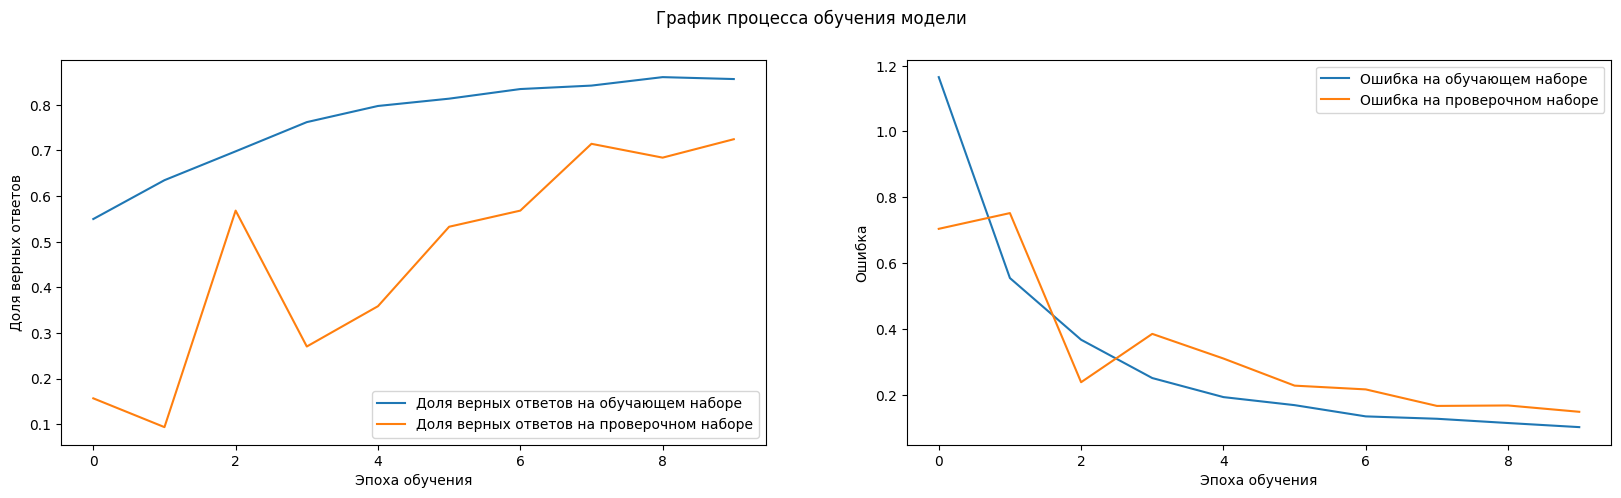

13/13 [==============================] - 0s 5ms/step - loss: 0.1577 - accuracy: 0.6818
Оценка на тестовых данных:
Test loss: 0.1577, Test accuracy: 0.6818
13/13 [==============================] - 0s 4ms/step


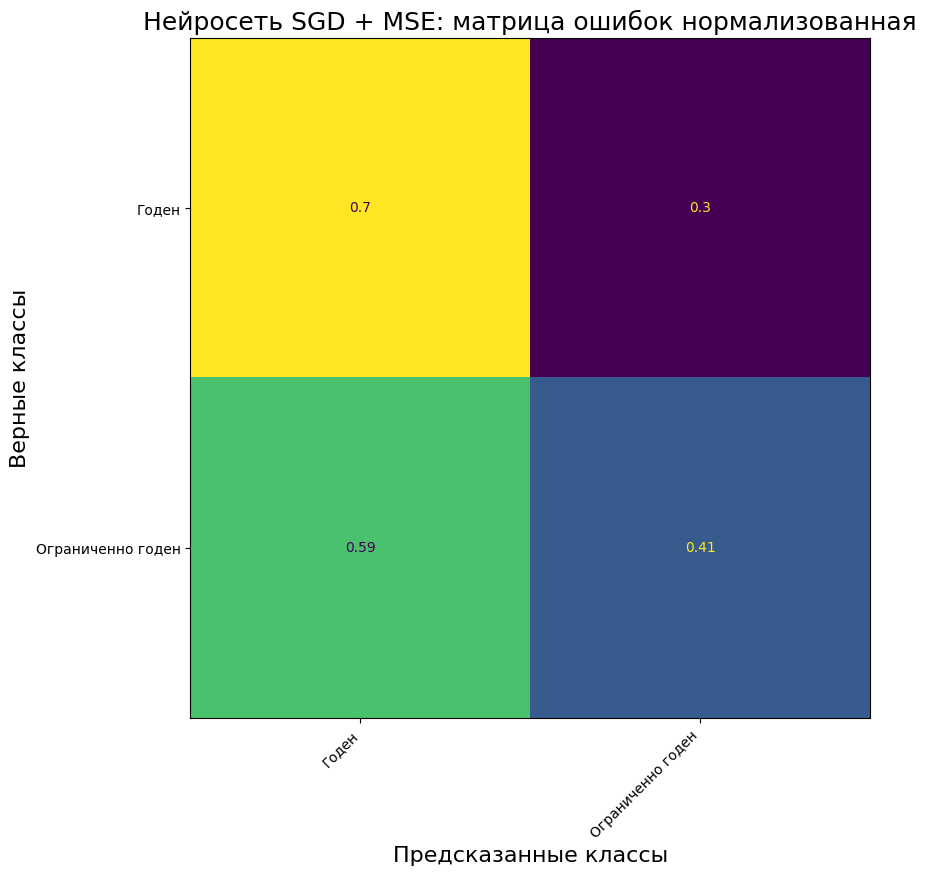

----------------------------------------------------------------------------------------------------
Нейросеть: SGD + MSE
Класс: Годен                 70% сеть отнесла к классу Годен                - ВЕРНО :-)
Класс: Ограниченно годен     59% сеть отнесла к классу Годен                - НЕВЕРНО :-(

Средняя точность распознавания:  56%


In [ ]:
# Создание нейросети
input_1 = Input(shape=(x_train_1.shape[1],))
input_2 = Input(shape=(x_train_2.shape[1],))
x1 = BatchNormalization()(input_1)
x1 = Dense(512, activation="selu")(x1)
x1 = BatchNormalization()(x1)
x1 = Dropout(0,5)(x1)
x1 = Dense(256, activation="selu")(x1)
x1 = BatchNormalization()(x1)
x1 = Dropout(0,5)(x1)

x2 = BatchNormalization()(input_2)
x2 = Dense(512, activation='selu')(x2)
x2 = BatchNormalization()(x2)
x2 = Dropout(0,5)(x2)
x2 = Dense(256, activation="selu")(x2)
x2 = BatchNormalization()(x2)
x2 = Dropout(0,5)(x2)

merged = Concatenate()([x1, x2])
dense_1 = Dense(256, activation='selu')(merged)
batch_1 = BatchNormalization()(dense_1)
drop_1 = Dropout(0,5)(batch_1)
dense_2 = Dense(256, activation='selu')(drop_1)
batch_2 = BatchNormalization()(dense_2)
output = Dense(2, activation='selu')(batch_2)

model = Model(inputs=[input_1, input_2], outputs=output)

compile_train_eval_model(model, [x_train_1, x_train_2], y_train,
                         [x_val_1, x_val_2], y_val,
                         [x_test_1, x_test_2], y_test,
                         optimizer='SGD',
                         loss='mean_squared_error',
                         epochs=15,
                         batch_size=128,
                         title='SGD + MSE')